# Required Focal Lenght Ablation Laser

* distance target -> snorkel = 4.58"
    * first window is a few mm further away
* distance snorkel -> outer surface vac chamber = 5.5"
    * outer window is roughly 1" from outer surface of vac chamber

No danger of burning a hole from reflections through any of the vacuum windows.

Make sure the distance between the lens and ablation laser is not close to the focal length of the lens.

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import pint
from scipy.optimize import brentq
ureg = pint.UnitRegistry()

In [67]:
def ax_change_size(ax, fs):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs) 
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)

* Beam expander can expand up to 1"
* snorkel hole has a diameter of 0.25"
* outer surface of snorkel is 4.58" from target.

In [32]:
beam_diameter = 1*ureg.inch
snorkel_diameter = 0.25 * ureg.inch
snorkel_loc = 4.58 * ureg.inch

In [33]:
def angle(x,y):
    return np.arctan(y/x)

In [34]:
def beam_radius_snorkel(f, beam_diameter, snorkel_loc):
    return beam_diameter/2 - np.tan(angle(f, beam_diameter/2))*(f-snorkel_loc)

In [55]:
f_min = brentq(lambda x: 2*beam_radius_snorkel(x, beam_diameter.magnitude, snorkel_loc.magnitude)-snorkel_diameter.magnitude, 1, 20)
print("minimum focal length : {0:.2f}\"".format(f_min))

minimum focal length : 18.32"


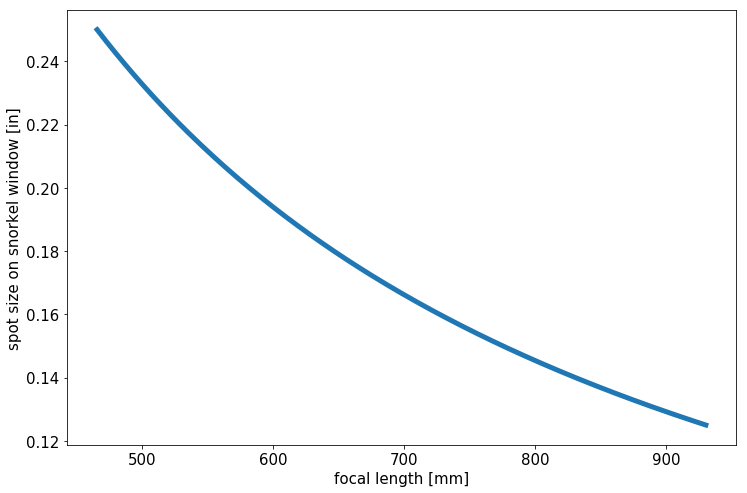

In [69]:
f = np.linspace(f_min,2*f_min,201) * ureg.inch
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(f.to(ureg.mm), 2*beam_radius_snorkel(f, beam_diameter, snorkel_loc), lw = 5)
ax.set_xlabel("focal length [mm]")
ax.set_ylabel("spot size on snorkel window [in]");
ax_change_size(ax, 15)